# Lab 7: Introduction to Markov chains and random graphs

In this lab we will be looking at Markov Processes.  Below is the code to import the modules we will be using throughout this lab.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
import networkx as nx  # If using your own computer may need to install networkx 
print ("Modules Imported!")

Modules Imported!


## Introduction to Markov Chains:

A Markov chain $(X[t]: t\geq 0)$ is a sequence of random variables such that the distribution of each variable is determined by the random variable before it.  Equivalently, it is a sequence of states visited by a form of finite state machine with random transitions.  To describe how to generate the chain we specify the initial probability distribution $\pi_0$ and a one-step transition probability matrix $P$.   We assume there is a finite state space described by {0,1,, . . . , $n-1$} for some $n$.  The intial distribution, $\pi(0)$, should be a probability vector (nonnegative entries with sum equal to one) of length $n$.   It consists of the probability the process is in a given state at time zero: ${\pi_i(0)} = P\{X[0]=i\}$ for $0\leq i \leq n-1.$    The matrix $P$ is an $n\times n$ matrix such that each row of the matrix is a probability vector.   If the state of the Markov chain at time $t-1$ is $i$ (in other words, if $X[t-1]=i$), then the (conditional) probability distribution of $X[t]$, the state at time $t$, is given by the ith row of $P.$ Additionally, we can look at the individual entries: $p_{ij}=P\left\{X[t]=j \; \big| \; X[t-1]=i\right\}$.  Below is a class that can be used to create a Markov chain.  An object in this class is created with specified values of $\pi_0$ and $P$, and can be used to calculate the state distribution at any time or to generate a sample path (i.e. a variate of the sequence of states) of the Markov chain.  

The state distributions are determined recursively as follows.  If $$\pi_i(t)=P\{X[t]=i\}$$ then by the law of total probability, $$\pi_j(t)= P\{X[t]=j\}=\sum_i P\{X[t-1]=i,X[t]=j\} =\sum_i \pi_i(t-1)p_{i,j}$$  That is, if we view $\pi(t)$ as a row vector for all $t,$ then $\pi(t)=\pi(t-1)P,$  where we have used multiplication of a row vector by a matrix.  (A nice introduction to Markov chains is given on wikipedia.)

In [2]:
# Markov chain object similar to random variable objects in scipy.stats (st)

class Markov_chain:
    def __init__(self, P, pi0):   # The transition probability matrix and initial distribution are passed
        self.P = P 
        self.pi0 = pi0
        self.n=np.size(pi0)
        if np.shape(P) != (self.n,self.n):
            print ("Error: Shape of P doesn't match pi0")
   
    def rvs(self,T):     # produce a length T segment of variates of the random process
        X = [np.random.choice(self.n, p=self.pi0)] 
        for t in range(1,T):
            X.append(np.random.choice(self.n, p=self.P[X[t-1],:]))
        return np.array(X)
    
    def pi(self,t):    # produce probability distribution at time t
        pi_new=self.pi0
        for s in range(t):
            pi_new = np.dot(pi_new, P)    # one step update of probability distribution
        return pi_new

# An example of how you can use the class to create and run through a simple two state chain
P=np.array([[0.9,0.1],[0.1,0.9]])
pi0=np.array([0.1,0.9])
print ('Simulated state sequence')
markov=Markov_chain(P,pi0)  
print (markov.rvs(100))
for t in range(20):
    print ("Distribution at time", t, ":", markov.pi(t))

Simulated state sequence
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1]
Distribution at time 0 : [0.1 0.9]
Distribution at time 1 : [0.18 0.82]
Distribution at time 2 : [0.244 0.756]
Distribution at time 3 : [0.2952 0.7048]
Distribution at time 4 : [0.33616 0.66384]
Distribution at time 5 : [0.368928 0.631072]
Distribution at time 6 : [0.3951424 0.6048576]
Distribution at time 7 : [0.41611392 0.58388608]
Distribution at time 8 : [0.43289114 0.56710886]
Distribution at time 9 : [0.44631291 0.55368709]
Distribution at time 10 : [0.45705033 0.54294967]
Distribution at time 11 : [0.46564026 0.53435974]
Distribution at time 12 : [0.47251221 0.52748779]
Distribution at time 13 : [0.47800977 0.52199023]
Distribution at time 14 : [0.48240781 0.51759219]
Distribution at time 15 : [0.48592625 0.51407375]
Distribution at time 16 : [0.488741 0

We won't go into this deeply, but notice how as the distributions change in time, they appear to be converging. For some Markov chains, there exists a limit for the distribution. If this occurs then the limit distribution $\pi$ satisfies $\pi = \pi P$ and $\pi$ is called an *equilibrium distribution.*

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Imagine that the states {0, . . . , n-1} of a particular Markov chain are the nodes of a ring graph, with state 0 following state n-1.   Create a Markov_chain object for n=6 with inital state 0 (so x[0]=0 with probability one) with the following transition probabilities:  given X[t-1]=i, X[t] is equal to i with probability 0.8 and to i+1 (modulo n) with probability 0.2.
<ol>
<li> Print the first 100 states for a simulation of the chain.</li>
<li> Simulate the chain for 10,000 time units, and calculate the number of complete revolutions the chain makes around the ring, divided by 10,000.  This is an estimate of the long term cycle rate for the Markov chain.  Repeat the experiment ten times to get an idea of the variation from one experiment to the next.</li>
<li> Give an analytical argument for what the long term cycle rate for this Makov chain should be.</li>

In [3]:
# Your code here

# Part 1
print('Part 1:')

P=np.array([[0.8, 0.2, 0, 0, 0, 0],
            [0, 0.8, 0.2, 0, 0, 0],
            [0, 0, 0.8, 0.2, 0, 0],
            [0, 0, 0, 0.8, 0.2, 0],
            [0, 0, 0, 0, 0.8, 0.2],
            [0.2, 0, 0, 0, 0, 0.8]])
pi0=np.array([1,0,0,0,0,0])
print ('Simulated state sequence')
markov=Markov_chain(P,pi0)
print (markov.rvs(100))

# Part 2
print('\nPart 2:')

# simulate the chain for 10,000 time units
markov_sim_10000 = markov.rvs(10000)

# calculate the number of complete revolutions the chain makes around the ring
num_comple_revol = 0
for i in range(1, len(markov_sim_10000)):
    if 5 == markov_sim_10000[i-1] and 0 == markov_sim_10000[i]:
        num_comple_revol += 1
print('The number of complete revolutions the chain makes around the ring:', num_comple_revol)

# estimate the long term cycle rate for the Markov chain
long_term_cycle_rate = num_comple_revol / 10000
print('The long term cycle rate for the Markov chain:', long_term_cycle_rate)

# repeat the experiment ten times
for j in range(10):
    print('\nExperiment'+str(j))
    # simulate the chain for 10,000 time units
    markov_sim_10000 = markov.rvs(10000)
    # calculate the number of complete revolutions the chain makes around the ring
    num_comple_revol = 0
    for i in range(1, len(markov_sim_10000)):
        if 5 == markov_sim_10000[i-1] and 0 == markov_sim_10000[i]:
            num_comple_revol += 1
    print('The number of complete revolutions the chain makes around the ring:', num_comple_revol)
    # estimate the long term cycle rate for the Markov chain
    long_term_cycle_rate = num_comple_revol / 10000
    print('The long term cycle rate for the Markov chain:', long_term_cycle_rate)

Part 1:
Simulated state sequence
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 3 3 3 3 3 3 3 4 4 5 5 0 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 4 4 4 4 5 5 5 0 0 0 0 0 1 1 1 1 1 2
 2 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5]

Part 2:
The number of complete revolutions the chain makes around the ring: 328
The long term cycle rate for the Markov chain: 0.0328

Experiment0
The number of complete revolutions the chain makes around the ring: 334
The long term cycle rate for the Markov chain: 0.0334

Experiment1
The number of complete revolutions the chain makes around the ring: 336
The long term cycle rate for the Markov chain: 0.0336

Experiment2
The number of complete revolutions the chain makes around the ring: 331
The long term cycle rate for the Markov chain: 0.0331

Experiment3
The number of complete revolutions the chain makes around the ring: 340
The long term cycle rate for the Markov chain: 0.034

Experiment4
The number of complete revolutions the chain makes around th

__Answer:__

__A3:__ 
The long term cycle rate for this Makov chain should be $\frac{\frac{10000}{5\times 6}}{10000}$, which is approximately $0.0333$.
To find out the long term cycle rate for this Makov chain, we need to get the number of trials needed until the state is incremented.
Each state in the sequence can be considered as a trial, and the trial has Geometric$(0.2)$, because the probability to increment the state in the trial is $0.2$. Therefore, the expected number of trials needed until the state is incremented is simply the expectation of Geometric$(0.2)$, which is 5. This expected number of trials for each state is identical, for the probability for each state to increment is $0.2$. With six states in the ring graph, the expected number of trials for a complete revolution to complete is $5\times 6$, i.e. $30$. As a result, the expected number of complete revolutions the chain makes around the ring for 10000 trials is $\frac{10000}{30}$, leading to a long term cycle rate for this Makov chain of $\frac{\frac{10000}{5\times 6}}{10000}$, i.e. $0.033333$.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Markov Gibberish

Let's look at some applications of a Markov Chain. When I was younger I remember using AIM (instant messenger) to talk to my friends. At some point people started to create bots which could hold conversations with users. Of course we had fun trying to get them to say things that didn't make sense, but the idea that it could generate somewhat relevant conversations was pretty cool. We're going to build a rudimentary version of that here. The code below generates text based on a large sample text, such that each word is generated based on the two words just before it.  The generated sequence of words is given by a 2-Markov chain (here "2" means that the distribution of the value of each word is determined by the two previous words, instead of just the one previous word).  That means that any three consecutive words in the generated text are also consecutive words somewhere in the sample text.   If words w1 w2 were the last two words added to the generated text string, then to generate the next word we look for all occurrences of w1 w2 as consecutive words in the sample text, and see what word was just after them for each occurrence.   The randomly generated text selects the next word to match one of those occurrences, selected at random with equal probability.

In [4]:
# Based on http://agiliq.com/blog/2009/06/generating-pseudo-random-text-with-markov-chains-u/    --BH
# Next word of random string is selected from possible word that follow the last two words.


class Markov_text:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def triples(self):
    #Generates triples from the given data string. So if our string were
    # "What a lovely day", we'd generate (What, a, lovely) and then (a, lovely, day)."""
           
        if self.word_size < 3:
            return
         
        for i in range(self.word_size - 2):
            yield (self.words[i], self.words[i+1], self.words[i+2])    #Like return but returns a generator to be used once
               
    def database(self):
        for w1, w2, w3 in self.triples():
            key = (w1, w2)
            if key in self.cache:
                self.cache[key].append(w3)
            else:
                self.cache[key] = [w3]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-3)
        w1, w2 = self.words[seed], self.words[seed+1]  # Initial key is (w1,w2)
        gen_words = [w1,w2]
        for i in range(size):
            w1, w2 = w2, np.random.choice(self.cache[(w1, w2)])
            gen_words.append(w2)
        return ' '.join(gen_words)
                
        
        
file_ = open('Jeeves.txt')
markov = Markov_text(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

# The above has a slight bug.   It is possible for the key to be the
# last two words in the text file and have no entry in the dictionary.
# This won't happen if the last two words in the text file appear
# consecutively somewhere else in the file.   -BH

'may be judicious to prevaricate a little." "How?" "If I might make the suggestion, his talent has always rolled tolerably free in the way these New York it looked a wreck. "I say!" I said, "Well, why don\'t you know! * * * As a matter of fact, I was going to bed, and it put me right again at once. I thought I heard him give an extra bit of money have something I could see Jeeves in an ordinary social call. She obviously looked on me as sinister. I had rather a foggy recollection of what Rocky had been doings'

With punctuation and everything, this initially looks like a bit of a mess. However, the sentences themselves are coming together and can make a little bit of sense. It is a very primitive version of those bots on instant messaging.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using the class above, do the following:
<ol><li> Find your own text file or copy and paste from somewhere and use the text to create gibberish from that. To work well, your file really needs to contain a large amount of text. The "Jeeves" file was pulled from a short story. Print out your own 100 word gibberish paragraph based on the text file you used.</li>
<li> Rewrite the code to create a 1-Markov Chain of the words instead of the 2-Markov Chain given above. Print out your own 100 word gibberish paragraph from this.</li>
<li> Rewrite the code to create a 3-Markov Chain of the words instead of the 2-Markov Chain given above. Print out your own 100 word gibberish paragraph from this.</li>
<li> Comment on the qualitative differences of your paragraphs using these methods.</li>

In [5]:
# Your code here (add additional code cells if necessary)

# Part 1
print('Part 1')

file_ = open('test.txt')
markov = Markov_text(file_)   # Creates the object markov using the file
gibberish = markov.generate_markov_text()   # Generate random text
print(gibberish)

Part 1
the problem. 1.F.4. Except for three days at Bristol, and Liverpool. Workingmen in the Democratic candidate, General McClellan, sought to redeem his pledge to end wars by forming a matrix, so develop a new custom. Other Presidents had discharged his bond of servitude under the authority of the Catholics in Canada, the Red River Valley, and in which blood vessels and produces a marked difference between the idle holders of fixed investments? 3. Explain the growth of what they called "the Empire" and was accounted an excellent argument with gentlemen who brought tea under this act he precipitated the conflict before he


In [6]:
class Markov_text_1:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def triples(self):
    #Generates triples from the given data string. So if our string were
    # "What a lovely day", we'd generate (What, a, lovely) and then (a, lovely, day)."""
           
        if self.word_size < 2:
            return
         
        for i in range(self.word_size - 1):
            yield (self.words[i], self.words[i+1])    #Like return but returns a generator to be used once
               
    def database(self):
        for w1, w2 in self.triples():
            key = (w1)
            if key in self.cache:
                self.cache[key].append(w2)
            else:
                self.cache[key] = [w2]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-2)
        w1 = self.words[seed]  # Initial key is (w1,w2)
        gen_words = [w1]
        for i in range(size):
            w1 = np.random.choice(self.cache[(w1)])
            gen_words.append(w1)
        return ' '.join(gen_words)

In [7]:
# Part 2
print('Part 2')

file_ = open('test.txt')
markov = Markov_text_1(file_)   # Creates the object markov using the file
gibberish = markov.generate_markov_text()   # Generate random text
print(gibberish)

Part 2
taking further strengthened the United States." Referring to adherents of the people, the heat of citizens and he turned up my consulting-room and throat, and power and a reason to drive to defend the short of the US Internal Saphena System on the President's remarkable successes. They are such a sponge; the reasons. It is not protect the edges 78 colonial, 42, 43 and Their failure of Locke, also had claimed the country when the foot or desire. It may be subject of Congress on the patient should be a Project Gutenberg eBooks given to have been successful banking facilities there....


In [8]:
class Markov_text_3:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def triples(self):
    #Generates triples from the given data string. So if our string were
    # "What a lovely day", we'd generate (What, a, lovely) and then (a, lovely, day)."""
           
        if self.word_size < 4:
            return
         
        for i in range(self.word_size - 3):
            #Like return but returns a generator to be used once
            yield (self.words[i], self.words[i+1], self.words[i+2], self.words[i+3])    
    def database(self):
        for w1, w2, w3, w4 in self.triples():
            key = (w1, w2, w3)
            if key in self.cache:
                self.cache[key].append(w4)
            else:
                self.cache[key] = [w4]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-4)
        w1, w2, w3 = self.words[seed], self.words[seed+1], self.words[seed+2]  # Initial key is (w1,w2)
        gen_words = [w1,w2,w3]
        for i in range(size):
            w1, w2, w3 = w2, w3, np.random.choice(self.cache[(w1, w2, w3)])
            gen_words.append(w3)
        return ' '.join(gen_words)

In [9]:
# Part 3
print('Part 3')

file_ = open('test.txt')
markov = Markov_text_3(file_)   # Creates the object markov using the file
gibberish = markov.generate_markov_text()   # Generate random text
print(gibberish)

Part 3
"It was lost, if I remember right, 'sent the pips to A, B, and C'--that is, sent the society's warning to them. Then there are successive entries that A and B cleared, or left the country, and finally that C was visited, with, I fear, a sinister result for C. Well, I think, Doctor, that we may never have shown symptoms of the disease. This doctrine, which is known as a professional beggar, but his life appeared to have been under such obligations to Turner, should still talk of marrying his son to marry my daughter with as little regard for what she


__Answer:__

__A4:__ The paragraph produced by 3-Markov Chain makes more sense to human than that produced by 2-Markov Chain, and the paragraph produced by 2-Markov Chain makes more sense to human than that produced by 1-Markov Chain.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Random Graphs and Working with Graphs

Markov chains that are time independent and finite can be represented really well by graphs. I'm sure you've used finite state machines to describe processes or sequences in some of your other classes. They can also be useful in analyzing or describing networks. Networkx is an extensive Python package for generating and analyzing graphs (the kind with nodes and edges) and can also plot them.  The following code adapted from the networkx webpage generates a random undirected graph by placing nodes at random locations within the unit square and connecting nodes together if their distance is less than a specified threshold.

The center node is located at: 0.5364095609962964 , 0.5172239976439658
The graph is connected


D:\Software\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


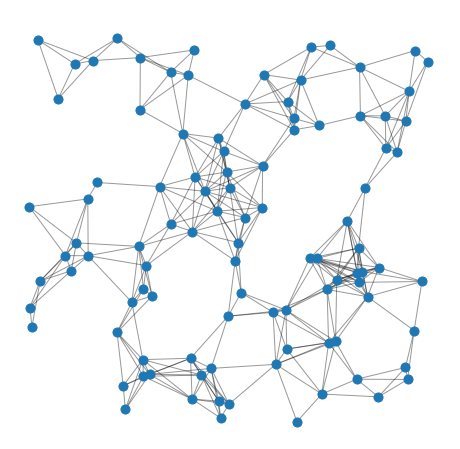

In [10]:
#import networkx as nx  DEBUGGING

d=0.16 # distance threshold, pairs of nodes within distance d are connected by an edge
G=nx.random_geometric_graph(100,d)  #100 nodes in unit square, distance threshold d
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')  # pos is a dictionary, with the indices as keys, ranging from 0 to 99

# find node nearest to (0.5,0.5), called the center node
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

print ('The center node is located at:', pos[ncenter][0], ',', pos[ncenter][1])
# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)  #p is dictionary: keys are nodes, values are distances to center
                                                    #Node not connected to the center node are not listed in p.
                                                    # p include the center node itself.

if nx.is_connected(G):   # The Networkx method is_connected checks for connectness
    print ("The graph is connected")
else: print ("The graph is not connected")

plt.figure(figsize=(8,8))
# nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)  #All edges are drwn
nx.draw_networkx_edges(G,pos,alpha=0.4)  #All edges are drwn
nx.draw_networkx_nodes(G,pos,alpha=0.3,node_size=80)  #All nodes are drawn but nearly transparent
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),   # Nodes connected to center node are drawn, closer nodes have darker color
                       node_size=80)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

Excellent documentation for NetworkX is available online (search for NetworkX documentation). We find a plethora of classes for generating both undirected graphs (no arrows on the edges) and directed graphs.   Run the code in the above cell a few dozen times, and see how often the graph generated is *connected*, meaning that there is a path through the graph from any node to any other node.   One way a graph could be not connnected is to have an isolated node, which is a node with no neighbors.   Also, try changing the value of the threshold d and seeing the effect on connectivity.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>**   Estimate the probability of connectivity for the above model (100 nodes at random locations in unit square with edges between pairs of nodes at distance d or smaller) for values of d in 0.10, 0.11, . . . , 0.20 by generating 1000 instances for each d and seeing the fraction of them that are connected. Is there a sort of threshold where the odds of a connected graph jumps significantly?

With d equaling 0.10, the fraction of connected graphs is 0.0000.
With d equaling 0.11, the fraction of connected graphs is 0.0000.
With d equaling 0.12, the fraction of connected graphs is 0.0000.
With d equaling 0.13, the fraction of connected graphs is 0.0160.
With d equaling 0.14, the fraction of connected graphs is 0.1160.
With d equaling 0.15, the fraction of connected graphs is 0.2750.
With d equaling 0.16, the fraction of connected graphs is 0.5070.
With d equaling 0.17, the fraction of connected graphs is 0.6780.
With d equaling 0.18, the fraction of connected graphs is 0.8080.
With d equaling 0.19, the fraction of connected graphs is 0.8720.
With d equaling 0.20, the fraction of connected graphs is 0.9330.


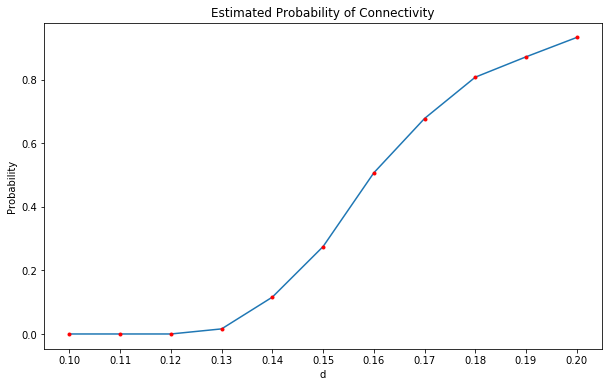

In [11]:
# Your code here

# estimate the probability of connectivity
d_values = [.10, .11, .12, .13, .14, .15, .16, .17, .18, .19, .20]
frac_connecteds = []
n_ins = 1000
for d in d_values:
    n_connected = 0
    for i in range(n_ins):
        G=nx.random_geometric_graph(100,d)  #100 nodes in unit square, distance threshold d
        if nx.is_connected(G):
            n_connected += 1
    frac_connected = n_connected / n_ins
    frac_connecteds.append(frac_connected)
    print('With d equaling %.2f, the fraction of connected graphs is %.4f.' %(d, frac_connected))
    
plt.figure(figsize=(10,6))
plt.plot(d_values, frac_connecteds)
plt.plot(d_values, frac_connecteds, 'r.')
plt.title('Estimated Probability of Connectivity')
plt.xlabel('d')
plt.ylabel('Probability')
plt.xticks(d_values)
plt.show()

__Answer:__ Yes, there is a sort of threshold that may be $0.14$.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

The probability of connectivity can be approximately computed analytically as follows.  You might have noticed in the simulations that the main cause of disconnectivity is having at least one isolated node (no neighbors).

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**   Consider the same model.  Imagine that 100 nodes, numbered from 1 to 100, are independently placed in the unit square with a uniform distribution for each node, and then edges are placed between pairs of nodes at distance d or smaller.  Except for the second half of the fourth part below, your answers should be an expression involving $d.$   No computation is required.
<ol><li> Focus on node 1. Suppose for simplicity it is not near the boundary of the square, so the entire disk of radius $d$ around the node is in the square.   What is the probability that a given other node (say, node 2) is *not* within distance $d$ of node 1?
<li>  What is the probability node 1 is isolated (i.e. *none* of the other nodes is within distance $d$ of node 1)?
<li>  What is the expected number of isolated nodes?
<li>  Assume (this is a reasonable approximation) the total number of isolated nodes has the Poisson distribution with mean given by the answer to the previous problem part.   What is the probability that there are no isolated nodes?
Compute the numerical values for  d in 0.10, 0.11, . . . , 0.20 and compare to the estimated probability the
graph is connected in Problem 3. </ol>

__Answer:__

__A1:__ $P\{\text{a given other node is not within distance $d$ of node 1}\} = \frac{1 - \pi d^2}{1} = 1 - \pi d^2$

__A2:__ $P\{\text{node 1 is isolated}\} = (\frac{1 - \pi d^2}{1})^{99} = (1 - \pi d^2)^{99}$

__A3:__ From __A2__, we know that the probability a given node is isolated is $(1 - \pi d^2)^{99}$. Besides, the number of isolated nodes obeys Binomial$(100, (1 - \pi d^2)^{99})$. Let $X$ denote the number of isolated nodes. Therefore, $E[X] = 100\times (1 - \pi d^2)^{99}$.

__A4:__ 
$
\therefore \lambda = 100\times (1 - \pi d^2)^{99}\\
\therefore X \sim \text{Poisson}(100\times (1 - \pi d^2)^{99})\\
\therefore P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!},\ \text{where}\ \lambda = 100\times (1 - \pi d^2)^{99}\\
\therefore P\{\text{there are no isolated nodes}\} = P(X=0) = e^{-100\times (1 - \pi d^2)^{99}}
$

To be honest, these two probabilities are quite different from each other except for $d$ equaling $0.10$ or $0.20$. The reason is that the assumption we make for simplicity in __this Problem__ may not be appropriate, which leads to underestimation on the probability a given other node is not within distance $d$ of node 1 and finally overestimation on the probability there are no isolated nodes. Besides, the probability that there are no isolated nodes must be larger than the probability that a graph is connected, for there exists situations where each node is connected to some other nodes while the graph is not connected. Therefore, the numerical probability we calculate is always larger than the estimated probability from __Problem 3__, just as what the below graph reveals.

Part 4
With d equaling 0.10, the numerical value of probability the graph is connected is 0.0144.
With d equaling 0.11, the numerical value of probability the graph is connected is 0.1157.
With d equaling 0.12, the numerical value of probability the graph is connected is 0.3598.
With d equaling 0.13, the numerical value of probability the graph is connected is 0.6368.
With d equaling 0.14, the numerical value of probability the graph is connected is 0.8310.
With d equaling 0.15, the numerical value of probability the graph is connected is 0.9319.
With d equaling 0.16, the numerical value of probability the graph is connected is 0.9755.
With d equaling 0.17, the numerical value of probability the graph is connected is 0.9919.
With d equaling 0.18, the numerical value of probability the graph is connected is 0.9976.
With d equaling 0.19, the numerical value of probability the graph is connected is 0.9993.
With d equaling 0.20, the numerical value of probability the graph is connected is 

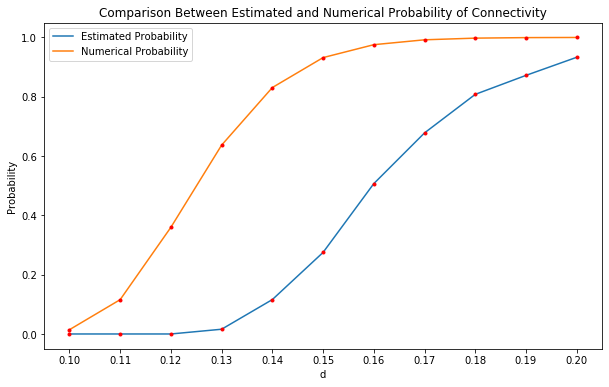

In [12]:
# Your code here (if necessary)

print('Part 4')

# compute the numerical values for d in 0.10, 0.11, . . . , 0.20
d_values = [.10, .11, .12, .13, .14, .15, .16, .17, .18, .19, .20]
P_connecteds = []

for d in d_values:
    P_connected = np.exp(-100*((1-np.pi*(d**2))**99))
    P_connecteds.append(P_connected)
    print('With d equaling %.2f, the numerical value of probability the graph is connected is %.4f.' %(d, P_connected))
    
plt.figure(figsize=(10,6))
plt.plot(d_values, frac_connecteds, label='Estimated Probability')
plt.plot(d_values, frac_connecteds, 'r.')
plt.plot(d_values, P_connecteds, label='Numerical Probability')
plt.plot(d_values, P_connecteds, 'r.')
plt.title('Comparison Between Estimated and Numerical Probability of Connectivity')
plt.xlabel('d')
plt.ylabel('Probability')
plt.xticks(d_values)
plt.legend()
plt.show()

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-4 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 